## Dataset Information

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

## Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset

In [2]:
df = pd.read_csv('./bank-additional1.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.0,999.0,0.0,nonexistent,1.Oca,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1.0,999.0,0.0,nonexistent,1.Nis,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3.0,999.0,0.0,nonexistent,1.Nis,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [33]:
# statistical info
df.describe()

,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,258.541082,2.468938,949.220441,0.192385,93.630281,-40.613828,5171.401403
std,233.387607,2.507927,216.973948,0.525516,0.555770,4.466145,72.483503
min,6.000000,1.000000,2.000000,0.000000,92.201000,-50.800000,4963.600000
25%,104.500000,1.000000,999.000000,0.000000,93.200000,-42.700000,5099.100000
50%,180.000000,2.000000,999.000000,0.000000,93.918000,-41.800000,5195.800000
75%,342.500000,3.000000,999.000000,0.000000,93.994000,-36.400000,5228.100000
max,1868.000000,27.000000,999.000000,5.000000,94.767000,-26.900000,5228.100000


In [34]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   object 
 1   job             499 non-null    object 
 2   marital         499 non-null    object 
 3   education       499 non-null    object 
 4   default         499 non-null    object 
 5   housing         499 non-null    object 
 6   loan            499 non-null    object 
 7   contact         499 non-null    object 
 8   month           499 non-null    object 
 9   day_of_week     499 non-null    object 
 10  duration        499 non-null    float64
 11  campaign        499 non-null    float64
 12  pdays           499 non-null    float64
 13  previous        499 non-null    float64
 14  poutcome        499 non-null    object 
 15  emp.var.rate    499 non-null    object 
 16  cons.price.idx  499 non-null    float64
 17  cons.conf.idx   499 non-null    f

## Preprocessing the dataset

In [3]:
df.isnull().sum()

age                  0
job               3620
marital           3620
education         3620
default           3620
housing           3620
loan              3620
contact           3620
month             3620
day_of_week       3620
duration          3620
campaign          3620
pdays             3620
previous          3620
poutcome          3620
emp.var.rate      3620
cons.price.idx    3620
cons.conf.idx     3620
euribor3m         3620
nr.employed       3620
y                 3620
dtype: int64

In [4]:
# check for null values
dfr = df.copy()
dfr.replace('unknown', np.nan, inplace=True)
dfr.isnull().sum()

age                  0
job               3627
marital           3621
education         3651
default           3727
housing           3630
loan              3630
contact           3620
month             3620
day_of_week       3620
duration          3620
campaign          3620
pdays             3620
previous          3620
poutcome          3620
emp.var.rate      3620
cons.price.idx    3620
cons.conf.idx     3620
euribor3m         3620
nr.employed       3620
y                 3620
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='count', ylabel='job'>

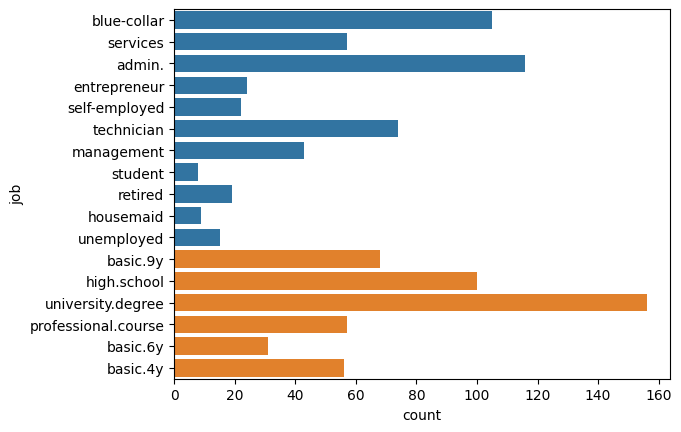

In [25]:
sns.countplot(df['job'])
sns.countplot(df['education'])

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

## Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

<Axes: xlabel='count', ylabel='y'>

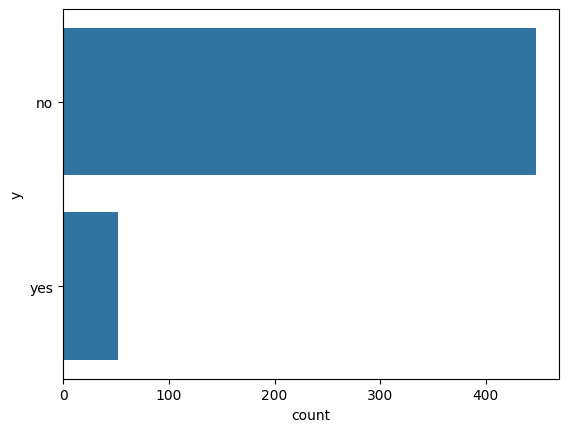

In [6]:
sns.countplot(df['y'])

<Axes: xlabel='count', ylabel='y'>

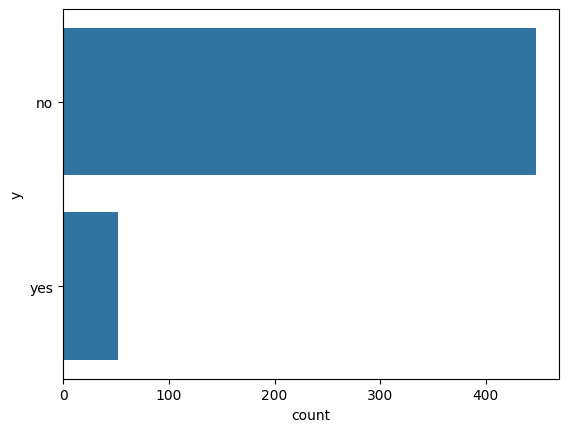

In [9]:
ymap = {'yes' : 1, 'no' : 0}
dfr['y'].map(ymap)
sns.countplot(dfr['y'])

## Coorelation Matrix

In [26]:
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

ValueError: could not convert string to float: '24;unknown;single;university.degree;no;yes;yes;cellular;jun;tue;696;1;999;2;failure;-2.9;92.963;-40.8;1.262;5076.2;no'

## Input Split

In [15]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

## Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

In [18]:
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

## Model Training

In [23]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.719626168224299


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.76      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.846846846846847


In [37]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.80      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8634361233480178


## Class Imbalancement

<AxesSubplot:xlabel='Class', ylabel='count'>

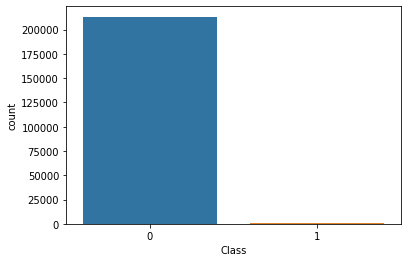

In [28]:
sns.countplot(y_train)

In [29]:
# hint - use combination of over sampling and under sampling
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

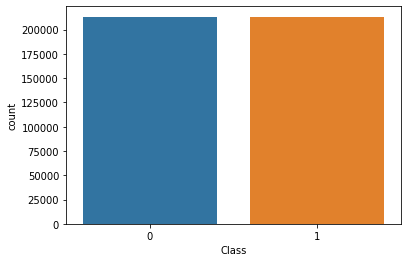

In [30]:
sns.countplot(y_smote)

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 Score: 0.11202466598150052


In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.79      0.83       123

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.832618025751073


In [35]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_smote, y_smote)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.74      0.85      0.79       123

    accuracy                           1.00     71202
   macro avg       0.87      0.93      0.90     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7924528301886793
